In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

from scipy import stats
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
data_processed = pd.read_excel('/Users/ashutoshanand/Documents/UGP- Sanjiv/Dataset and Code files/Tomato Processed data.xlsx',index_col='Date')

In [6]:
data_processed

,W.sale Avg.Price,Inflation_rate,Growth_rate,Log_MS,Month,Year,Quarter,W.sale Avg.Price_1M_Lag,W.sale Avg.Price_3M_Lag,Inflation_rate_1M_Lag,...,Growth_rate_1M_Lag,Growth_rate_3M_Lag,Log_MS_1M_Lag,Log_MS_3M_Lag,Price_3M_Rolling_Mean,Price_6M_Rolling_Mean,Price_3M_Rolling_Std,Price_6M_Rolling_Std,Inflation_Growth_Interaction,seasonal_component
Date,,,,,,,,,,,,,,,,,,,,,
2000-06-01,1182.0,5.238095,38.171534,16.281510,6,2000,2,736.0,392.0,5.011930,...,38.194843,30.215964,16.267717,16.235144,719.333333,599.500000,471.221109,332.994745,199.946120,1.244693
2000-07-01,953.0,4.952828,13.306099,16.281959,7,2000,3,1182.0,240.0,5.238095,...,38.171534,27.288814,16.281510,16.261410,957.000000,657.833333,223.026904,363.031909,65.902813,1.386104
2000-08-01,944.0,3.990609,22.953398,16.288343,8,2000,3,953.0,736.0,4.952828,...,13.306099,38.194843,16.281959,16.267717,1026.333333,741.166667,134.886372,361.513716,91.598023,1.185297
2000-09-01,920.0,3.496508,41.795593,16.303125,9,2000,3,944.0,1182.0,3.990609,...,22.953398,38.171534,16.288343,16.281510,939.000000,829.166667,17.058722,321.577622,146.138613,1.137432
2000-10-01,3500.0,2.746003,47.315842,16.319555,10,2000,4,920.0,953.0,3.496508,...,41.795593,13.306099,16.303125,16.281959,1788.000000,1372.500000,1482.684053,1051.858118,129.929446,1.408927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,2511.0,6.998158,-0.679758,19.165064,8,2022,3,2389.0,4426.0,6.707692,...,2.205323,19.721981,19.164157,19.147374,3242.000000,2826.500000,1373.139833,1476.515188,-4.757056,1.185297
2022-09-01,3837.0,7.414216,3.320463,19.166083,9,2022,3,2511.0,4826.0,6.998158,...,-0.679758,12.622150,19.165064,19.146480,2912.333333,3238.833333,803.104808,1323.604989,24.618631,1.137432
2022-10-01,4450.0,6.767372,-4.074074,19.176894,10,2022,4,3837.0,2389.0,7.414216,...,3.320463,2.205323,19.166083,19.164157,3599.333333,3739.833333,991.107630,1048.727117,-27.570773,1.408927


In [8]:
# Updated exogenous variables after feature engineering
exog_enhanced = data_processed.drop(['W.sale Avg.Price'], axis=1)
target_processed = data_processed['W.sale Avg.Price']

In [10]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(data_processed) * 0.80)
train_target = target_processed[:train_size]
test_target = target_processed[train_size:]
train_exog = exog_enhanced[:train_size]
test_exog = exog_enhanced[train_size:]

In [12]:
from pmdarima import auto_arima

In [14]:
model = auto_arima(train_target,
                 start_p=0, max_p=5,
                 start_q=0, max_q=5,
                 d=None,  # Let the function determine differencing
                 start_P=0, max_P=2,
                 start_Q=0, max_Q=2,
                 D=None,  # Let the function determine seasonal differencing
                 m=12,    # Monthly seasonality
                 seasonal=True,
                 trace=True,  # Print model results during search
                 error_action='ignore',
                 suppress_warnings=True,
                 stepwise=False)  

print(model.summary())

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3424.863, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=3424.882, Time=0.03 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3413.222, Time=0.11 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3423.492, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=3387.109, Time=0.21 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3358.084, Time=0.87 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=3402.030, Time=0.23 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=3369.417, Time=0.73 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=3359.868, Time=1.18 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3426.939, Time=0.02 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3427.042, Time=0.12 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3414.505, Time=0.26 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3425.323, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3381.350, Time=1.09 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3348.721, Time=1.40

In [20]:
sarimax_model = SARIMAX(
    train_target,
    exog=train_exog,
    order=(2, 1, 0),           # (p,d,q) for the non-seasonal part
    seasonal_order=(1, 0, 2, 12)  # (P,D,Q,s) for the seasonal part with s=12 for monthly data
)

# Fit the model
model_fit = sarimax_model.fit(disp=False)

# Print model summary
print(model_fit.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                        W.sale Avg.Price   No. Observations:                  216
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1606.468
Date:                                 Sun, 20 Apr 2025   AIC                           3264.935
Time:                                         01:35:56   BIC                           3352.572
Sample:                                     06-01-2000   HQIC                          3300.344
                                          - 05-01-2018                                         
Covariance Type:                                   opg                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Inflation_rate                 183.210

In [22]:
# Forecast on test set
forecast = model_fit.get_forecast(steps=len(test_target), exog=test_exog)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


Mean Squared Error (MSE): 999999.01
Root Mean Squared Error (RMSE): 1000.00
Mean Absolute Error (MAE): 872.68
Mean Absolute Percentage Error (MAPE): 38.53%
R-squared (R²): 0.1795


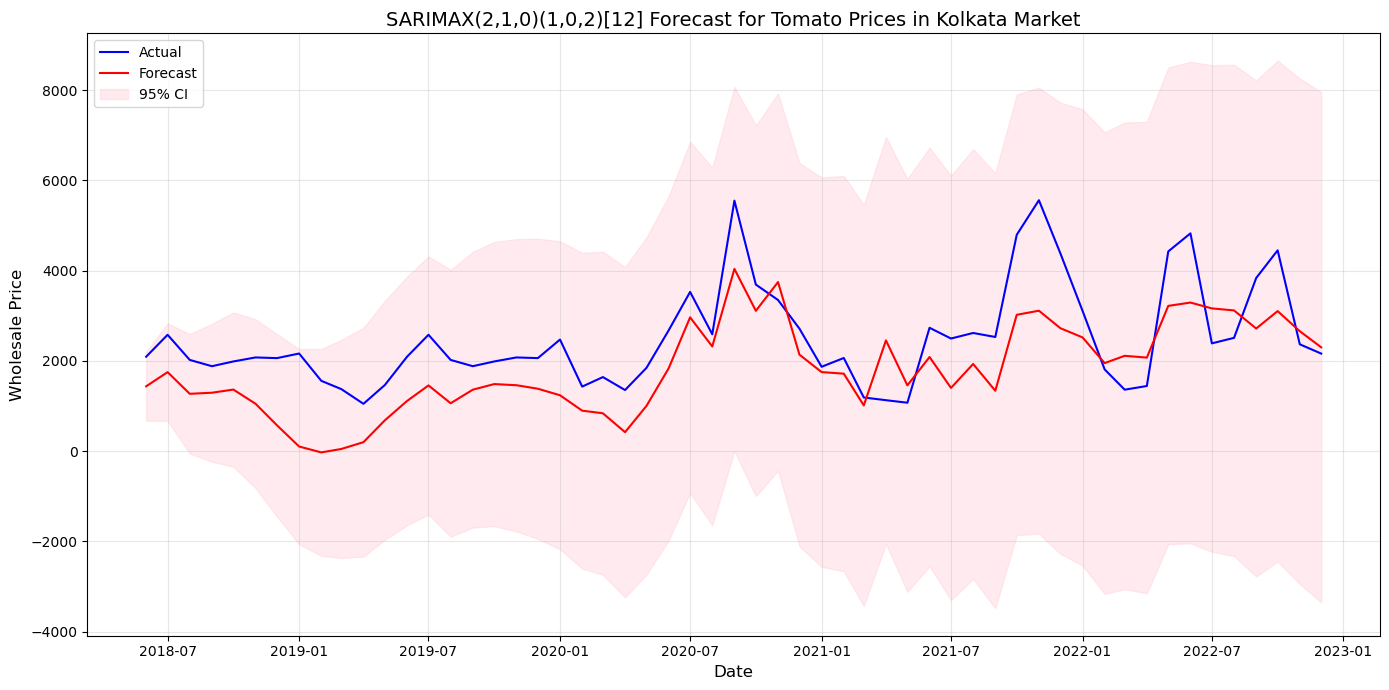

In [26]:
# Calculate performance metrics
mse = mean_squared_error(test_target, predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predicted_mean)
mae = mean_absolute_error(test_target, predicted_mean)
mape = np.mean(np.abs((test_target - predicted_mean) / test_target)) * 100


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Plot the results with 95% confidence interval
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red')
plt.fill_between(test_target.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')

# Format the plot
plt.title('SARIMAX(2,1,0)(1,0,2)[12] Forecast for Tomato Prices in Kolkata Market', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wholesale Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


##  Statistical Significance Analysis

Based on the model output (`P>|z|` values), we identify the following:

###  Non-significant Variables to Remove (p > 0.05)
- `Log_MS` (p = 0.749)
- `Month` (p = 0.590)
- `Year` (p = 0.684)
- `Quarter` (p = 0.593)
- `Inflation_rate_1M_Lag` (p = 0.667)
- `Inflation_rate_3M_Lag` (p = 0.414)
- `Growth_rate_1M_Lag` (p = 0.752)
- `Growth_rate_3M_Lag` (p = 0.434)
- `Log_MS_3M_Lag` (p = 0.439)
- `Inflation_Growth_Interaction` (p = 0.066) ⟶ *marginally significant*

### ARIMA Components to Reconsider (all p > 0.85)
- `ar.L1` (p = 0.981)
- `ar.L2` (p = 0.863)
- `ar.S.L12` (p = 0.995)
- `ma.S.L12` (p = 0.995)
- `ma.S.L24` (p = 0.994)

---

## Statistically Significant Variables to Retain
| Variable                        | p-value | Note |
|---------------------------------|---------|------|
| `Inflation_rate`               | 0.000   | Strong positive influence |
| `Growth_rate`                  | 0.022   | Statistically significant |
| `W.sale Avg.Price_1M_Lag`      | 0.000   | Highly significant |
| `W.sale Avg.Price_3M_Lag`      | 0.008   | Significant historical effect |
| `Log_MS_1M_Lag`                | 0.051   | *Marginally significant* |
| `Price_3M_Rolling_Mean`        | 0.000   | Strong positive influence |
| `Price_6M_Rolling_Mean`        | 0.023   | Medium-term mean reversion |
| `Price_3M_Rolling_Std`         | 0.006   | Short-term volatility impact |
| `Price_6M_Rolling_Std`         | 0.000   | Medium-term volatility boost |
| `seasonal_component`           | 0.000   | Highly significant seasonal driver |

---




In [32]:
# Updated exogenous variables after feature engineering
exog_enhanced = exog_enhanced[[
    'Inflation_rate',
    'Growth_rate',
    'W.sale Avg.Price_1M_Lag',
    'W.sale Avg.Price_3M_Lag',
    'Log_MS_1M_Lag',  # marginally significant
    'Price_3M_Rolling_Mean',
    'Price_6M_Rolling_Mean',
    'Price_3M_Rolling_Std',
    'Price_6M_Rolling_Std',
    'seasonal_component'
]]


In [34]:
# Split data into training and testing sets (80-20 split)
train_size = int(len(data_processed) * 0.80)
train_target = target_processed[:train_size]
test_target = target_processed[train_size:]
train_exog = exog_enhanced[:train_size]
test_exog = exog_enhanced[train_size:]

In [42]:
# Revised model with reduced AR terms and only significant predictors
revised_model = SARIMAX(
    train_target,
    exog=train_exog,
    order=(2, 1, 0),  # Remove AR terms, keep integration
    seasonal_order=(1, 0, 2, 12))  # Remove seasonal AR terms

# Fit the model
revised_fit = revised_model.fit(disp=False)
print(revised_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                        W.sale Avg.Price   No. Observations:                  216
Model:             SARIMAX(2, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1592.619
Date:                                 Sun, 20 Apr 2025   AIC                           3217.239
Time:                                         01:49:39   BIC                           3271.169
Sample:                                     06-01-2000   HQIC                          3239.029
                                          - 05-01-2018                                         
Covariance Type:                                   opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Inflation_rate            168.5492     33.036   

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
# Forecast on test set
forecast = revised_fit.get_forecast(steps=len(test_target), exog=test_exog)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


Mean Squared Error (MSE): 647645.46
Root Mean Squared Error (RMSE): 804.76
Mean Absolute Error (MAE): 595.50
Mean Absolute Percentage Error (MAPE): 28.93%
R-squared (R²): 0.4686


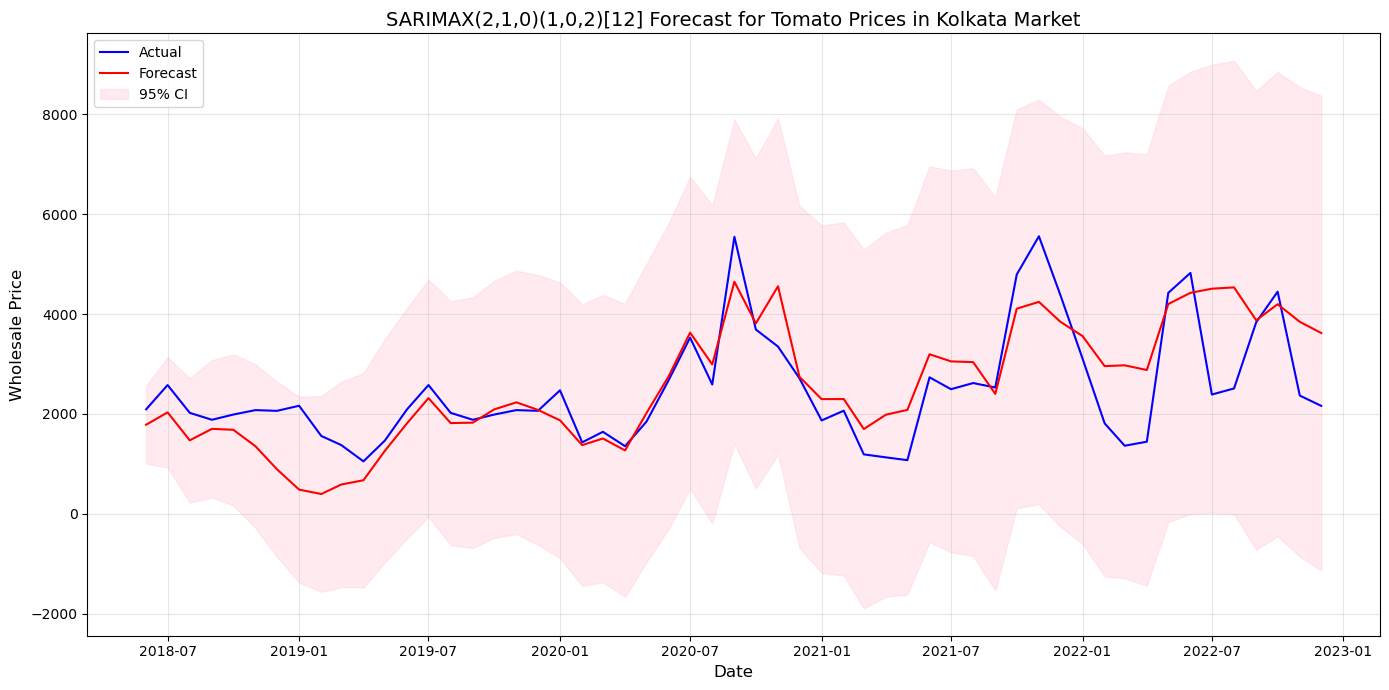

In [48]:
# Calculate performance metrics
mse = mean_squared_error(test_target, predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(test_target, predicted_mean)
mae = mean_absolute_error(test_target, predicted_mean)
mape = np.mean(np.abs((test_target - predicted_mean) / test_target)) * 100


print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R²): {r2:.4f}")

# Plot the results with 95% confidence interval
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label='Actual', color='blue')
plt.plot(test_target.index, predicted_mean, label='Forecast', color='red')
plt.fill_between(test_target.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='95% CI')

# Format the plot
plt.title('SARIMAX(2,1,0)(1,0,2)[12] Forecast for Tomato Prices in Kolkata Market', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Wholesale Price', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
